In [74]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.monitor import job_monitor
from qiskit import QuantumCircuit, execute,IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2023-01-17 14:02:59,645: Credentials are already in use. The existing account in the session will be replaced.


In [80]:

def his_backend(circuit):
    backend = provider.get_backend('ibmq_qasm_simulator')
    job = execute(circuit, backend, shots=1000)
    job_monitor(job)
    counts = job.result().get_counts()
    return counts

def his_sim(circuit):
    aer_sim = Aer.get_backend('aer_simulator')
    qobj = assemble(circuit)
    result = aer_sim.run(qobj).result()
    counts = result.get_counts()
    return counts

# grover algorithm

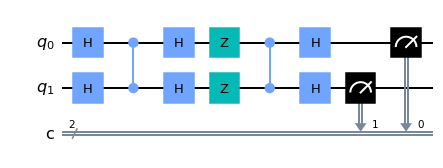

In [89]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.cz(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.z(qreg_q[1])
circuit.z(qreg_q[0])
circuit.cz(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw()

{'11': 1024}


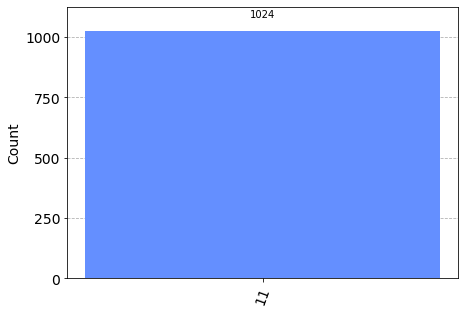

In [90]:
counts = his_sim(circuit)
plot_histogram(counts)

# One time error correction

## Bit flip

### Orcale

#### single vote 

Bit flip: orcale + single vote 

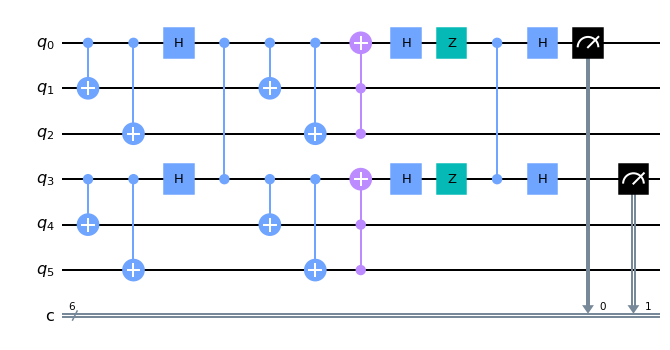

In [91]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.h(qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.h(qreg_q[0])
circuit.z(qreg_q[3])
circuit.z(qreg_q[0])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.draw()

{'000001': 242, '000011': 254, '000000': 266, '000010': 262}


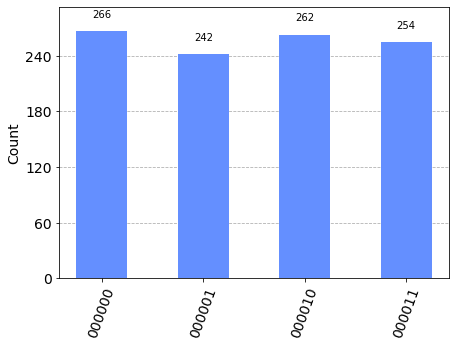

In [92]:
counts = his_sim(circuit)
plot_histogram(counts)

#### Majority vote

##### Method 1:

bit flip: oracle + majority vote

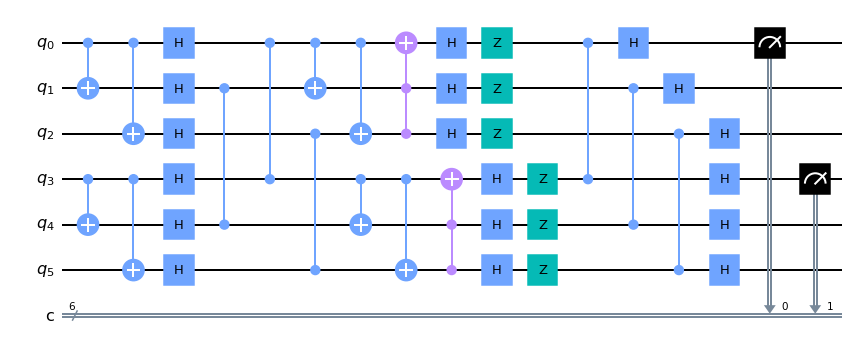

In [93]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[4])
circuit.z(qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[5])
circuit.z(qreg_q[0])
circuit.z(qreg_q[1])
circuit.z(qreg_q[2])
circuit.z(qreg_q[5])
circuit.z(qreg_q[3])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.draw()

{'000011': 63, '000001': 213, '000010': 185, '000000': 563}


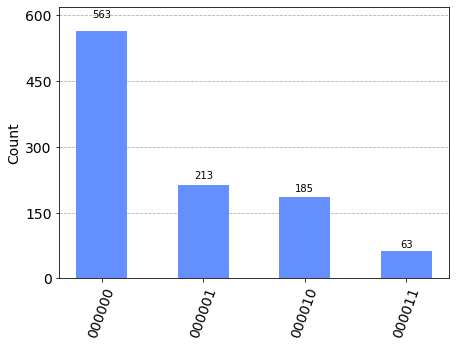

In [94]:
counts = his_sim(circuit)
plot_histogram(counts)

##### Method 2:

bit flip: oracle + majority vote ( Method 2)

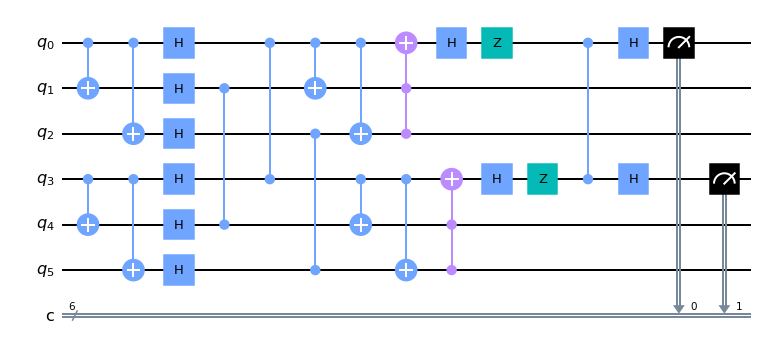

In [95]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.z(qreg_q[0])
circuit.z(qreg_q[3])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.draw()

{'000011': 72, '000001': 194, '000010': 177, '000000': 581}


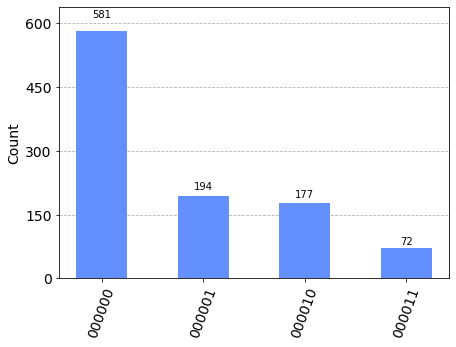

In [96]:
counts = his_sim(circuit)
plot_histogram(counts)

### Diffuser

#### Single

Bit flip: diffuser + single vote 

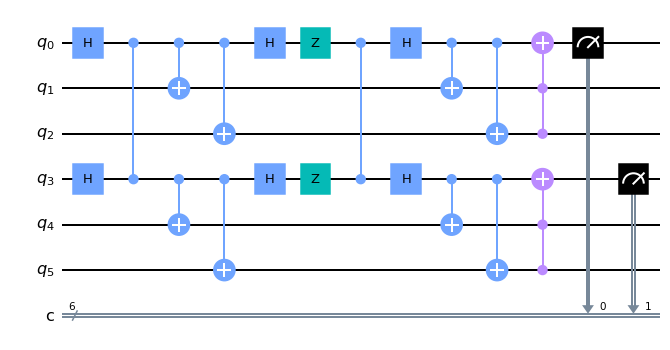

In [97]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.z(qreg_q[3])
circuit.h(qreg_q[0])
circuit.z(qreg_q[0])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.draw()

{'000000': 243, '000010': 266, '000001': 253, '000011': 262}


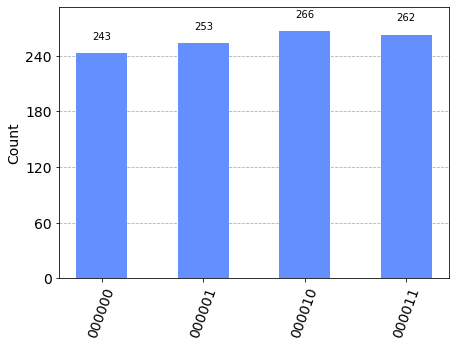

In [98]:
counts = his_sim(circuit)
plot_histogram(counts)

#### majority vote

##### Method 1

bit flip: diffuser+ majority vote ( method 1)

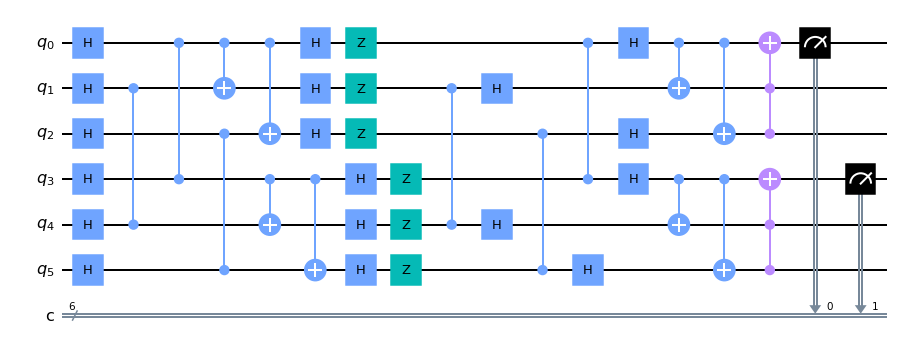

In [99]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[3])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.z(qreg_q[4])
circuit.h(qreg_q[1])
circuit.z(qreg_q[5])
circuit.z(qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.z(qreg_q[1])
circuit.z(qreg_q[0])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.z(qreg_q[2])
circuit.h(qreg_q[1])
circuit.h(qreg_q[4])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.draw()

{'000001': 240, '000010': 259, '000000': 281, '000011': 244}


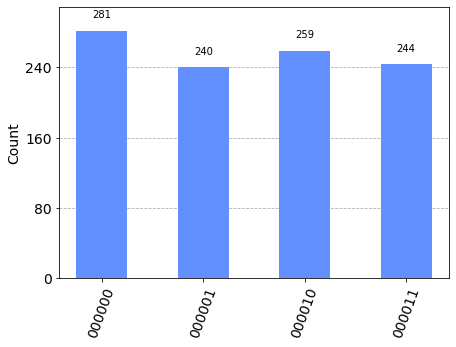

In [100]:
counts = his_sim(circuit)
plot_histogram(counts)

##### Method 2

bit flip: diffuser+ majority vote ( method 2)

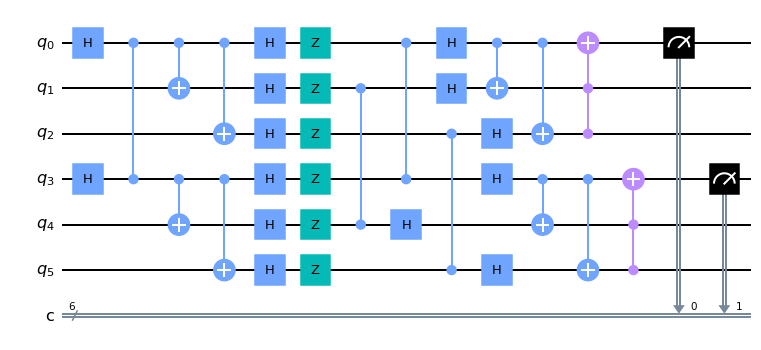

In [101]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[3])
circuit.z(qreg_q[1])
circuit.z(qreg_q[0])
circuit.z(qreg_q[2])
circuit.z(qreg_q[4])
circuit.z(qreg_q[5])
circuit.z(qreg_q[3])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.h(qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[1])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[5])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.draw()

{'000011': 77, '000001': 199, '000010': 192, '000000': 556}


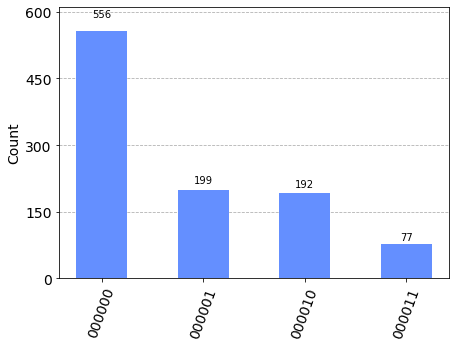

In [102]:
counts = his_sim(circuit)
plot_histogram(counts)

### Glover algorithm

#### Majority

Bit flip: Glover algorithm + Majority vote 

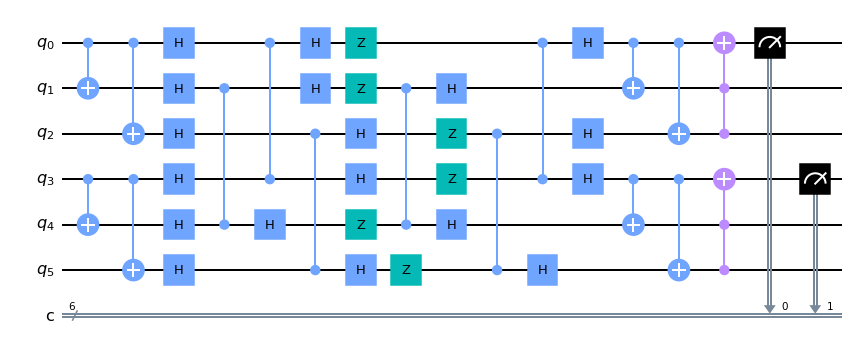

In [103]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[4])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.z(qreg_q[0])
circuit.h(qreg_q[5])
circuit.h(qreg_q[2])
circuit.z(qreg_q[4])
circuit.h(qreg_q[3])
circuit.z(qreg_q[1])
circuit.z(qreg_q[5])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.z(qreg_q[3])
circuit.z(qreg_q[2])
circuit.h(qreg_q[1])
circuit.h(qreg_q[4])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])

circuit.draw()

{'000011': 1024}


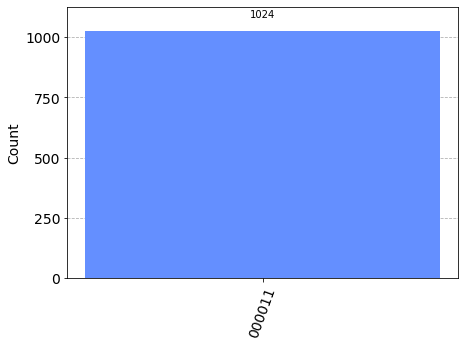

In [104]:
counts = his_sim(circuit)
plot_histogram(counts)

#### Single

Bit flip: Glover algorithm + single

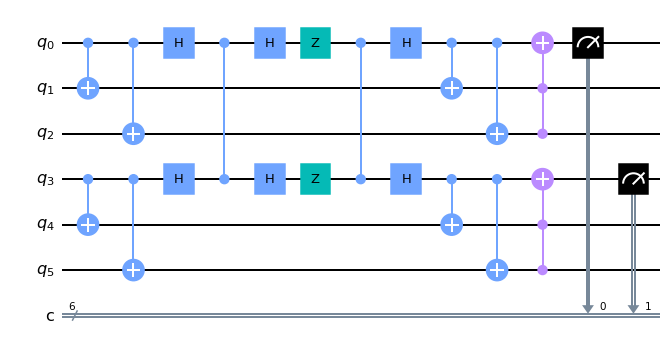

In [105]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[0])
circuit.z(qreg_q[0])
circuit.h(qreg_q[3])
circuit.z(qreg_q[3])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])

circuit.draw()

{'000000': 1024}


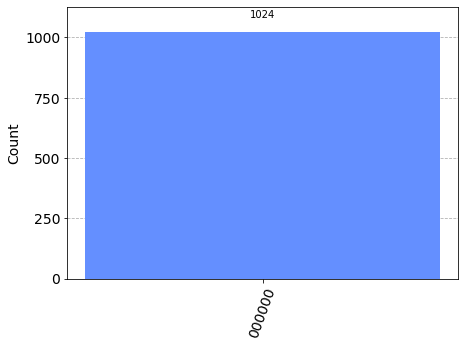

In [106]:
counts = his_sim(circuit)
plot_histogram(counts)

## Phase flip

### Oracle

#### Majority vote 

##### Method 1

phase flip: oracle + majority vote ( method 1)

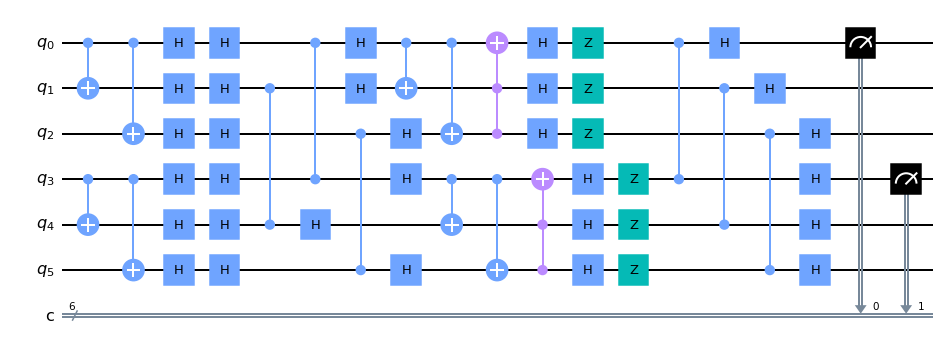

In [107]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[4])
circuit.h(qreg_q[1])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[5])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.h(qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.z(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[1])
circuit.z(qreg_q[1])
circuit.z(qreg_q[4])
circuit.z(qreg_q[5])
circuit.z(qreg_q[3])
circuit.z(qreg_q[2])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[2])
circuit.h(qreg_q[5])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.draw()

{'000001': 227, '000011': 281, '000000': 267, '000010': 249}


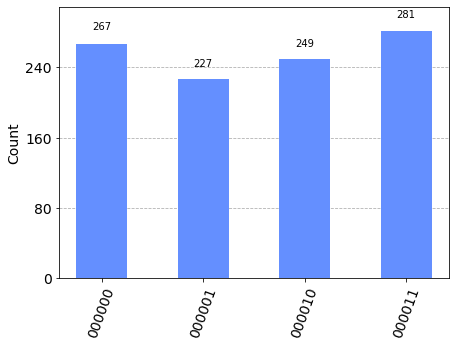

In [108]:
counts = his_sim(circuit)
plot_histogram(counts)

##### Method 2

phase flip: oracle + majority vote ( method 2)

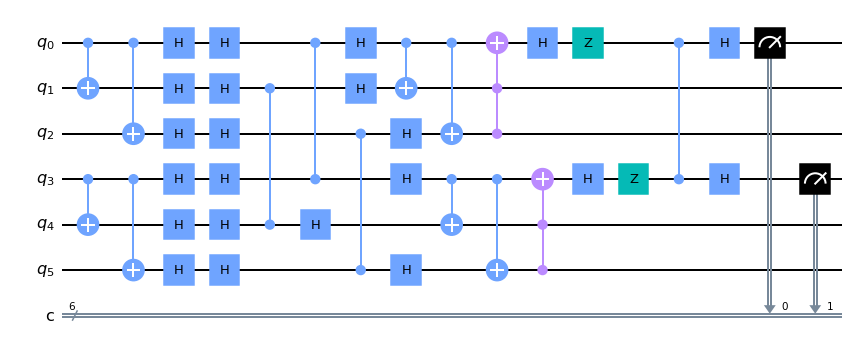

In [109]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[4])
circuit.h(qreg_q[1])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[5])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.z(qreg_q[0])
circuit.z(qreg_q[3])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.draw()

{'000011': 240, '000001': 255, '000000': 248, '000010': 281}


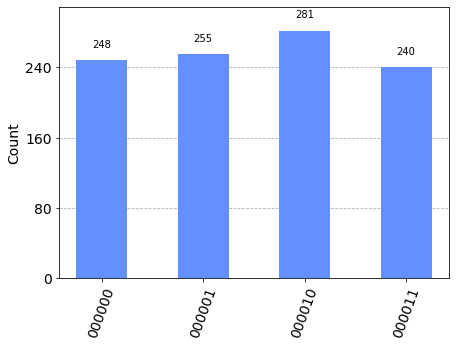

In [110]:
counts = his_sim(circuit)
plot_histogram(counts)

#### Single

Phase flip: oracle + single

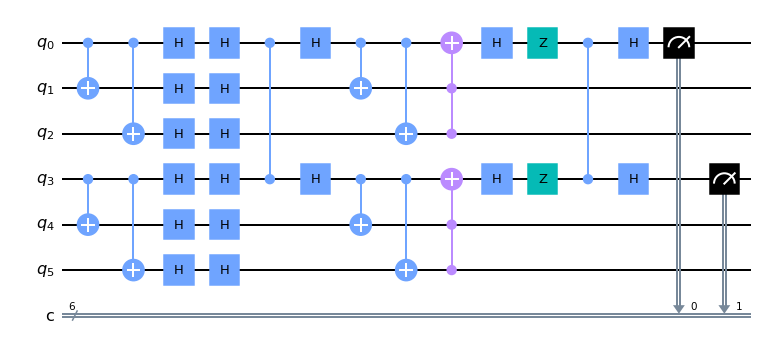

In [112]:
qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.h(qreg_q[4])
circuit.h(qreg_q[2])
circuit.h(qreg_q[1])
circuit.h(qreg_q[5])
circuit.h(qreg_q[3])
circuit.h(qreg_q[2])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.z(qreg_q[3])
circuit.z(qreg_q[0])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.draw()

{'000011': 267, '000001': 282, '000010': 247, '000000': 228}


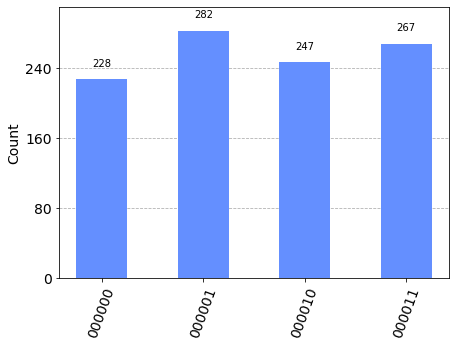

In [113]:
counts = his_sim(circuit)
plot_histogram(counts)

### Diffuser 

#### Single

Phase flip: diffuser + Single

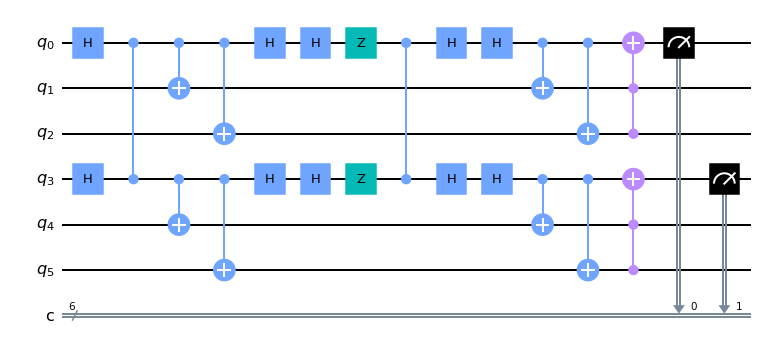

In [114]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.z(qreg_q[3])
circuit.z(qreg_q[0])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.draw()

{'000011': 243, '000000': 264, '000010': 236, '000001': 281}


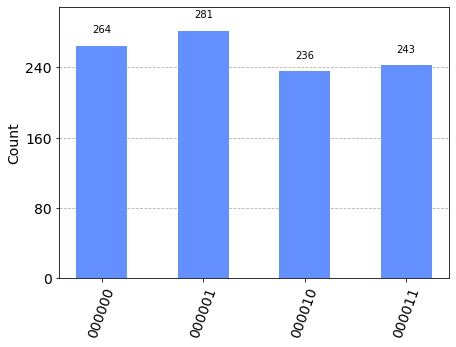

In [115]:
counts = his_sim(circuit)
plot_histogram(counts)

#### Majority 

##### Method 1

phase flip: diffuser + majority vote ( method 1)

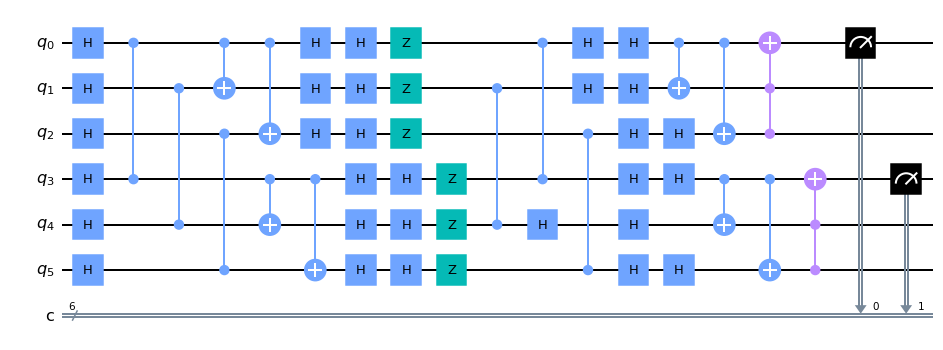

In [116]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[1])
circuit.h(qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[5])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[5])
circuit.z(qreg_q[0])
circuit.z(qreg_q[1])
circuit.z(qreg_q[4])
circuit.z(qreg_q[3])
circuit.z(qreg_q[5])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.z(qreg_q[2])
circuit.h(qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[1])
circuit.h(qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[5])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.h(qreg_q[2])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.draw()

{'000001': 288, '000010': 230, '000000': 253, '000011': 253}


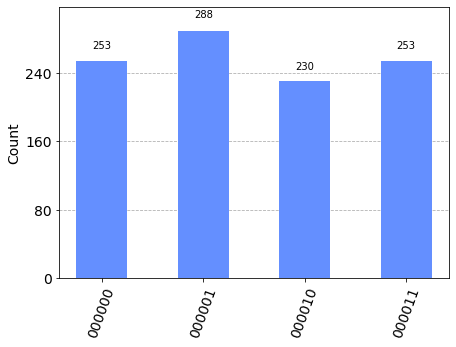

In [117]:
counts = his_sim(circuit)
plot_histogram(counts)

##### Method 2

phase flip: diffuser + majority vote ( method 2)

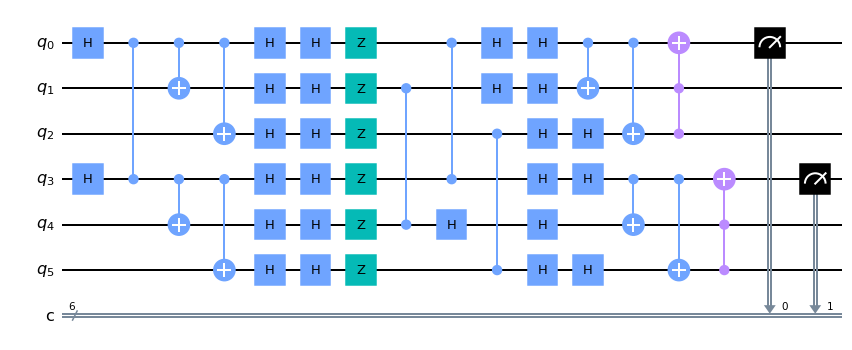

In [118]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[5])
circuit.z(qreg_q[0])
circuit.z(qreg_q[1])
circuit.z(qreg_q[4])
circuit.z(qreg_q[3])
circuit.z(qreg_q[5])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.z(qreg_q[2])
circuit.h(qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[4])
circuit.h(qreg_q[3])
circuit.h(qreg_q[1])
circuit.h(qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[5])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.h(qreg_q[2])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.draw()

{'000000': 263, '000010': 238, '000001': 271, '000011': 252}


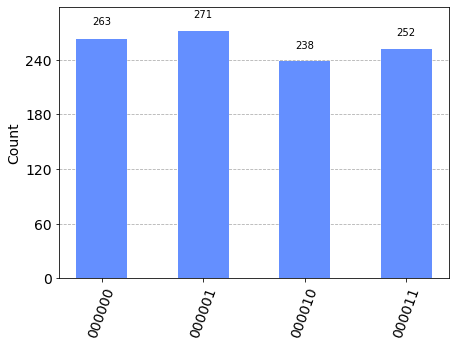

In [119]:
counts = his_sim(circuit)
plot_histogram(counts)

### Glover algorithm

#### Majority vote

Phase flip: Glover algorithm + Majority vote 

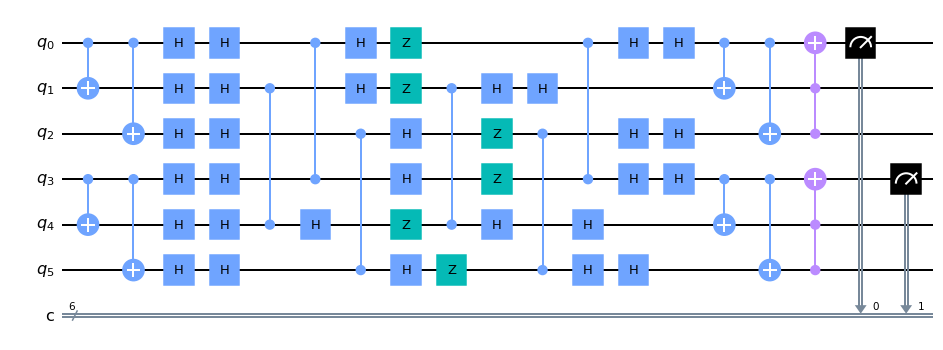

In [120]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[4])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.z(qreg_q[0])
circuit.h(qreg_q[5])
circuit.h(qreg_q[2])
circuit.z(qreg_q[4])
circuit.h(qreg_q[3])
circuit.z(qreg_q[1])
circuit.z(qreg_q[5])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.z(qreg_q[3])
circuit.z(qreg_q[2])
circuit.h(qreg_q[1])
circuit.h(qreg_q[4])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[5])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])

circuit.draw()
# editor = CircuitComposer(circuit=circuit)
# editor

{'000011': 253, '000010': 276, '000000': 253, '000001': 242}


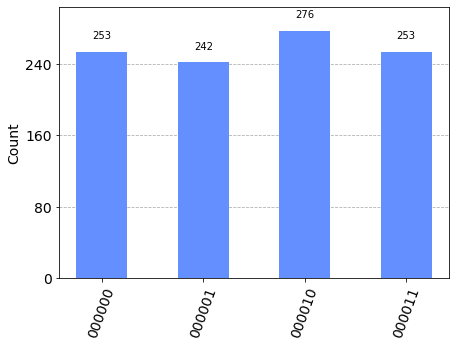

In [121]:
counts = his_sim(circuit)
plot_histogram(counts)

#### Single

Phase flip: Glover algorithm + single

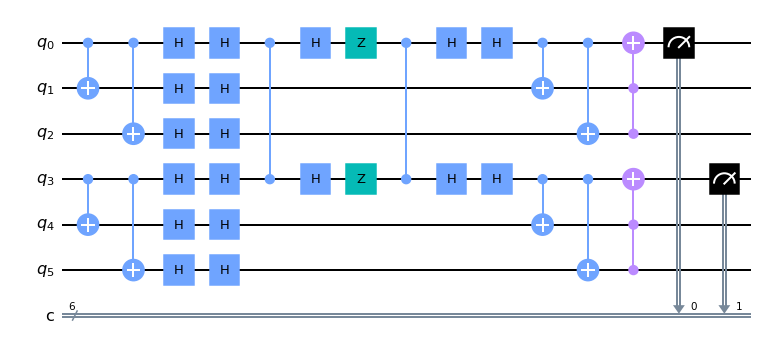

In [122]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[0])
circuit.z(qreg_q[0])
circuit.h(qreg_q[3])
circuit.z(qreg_q[3])
circuit.h(qreg_q[1])
circuit.h(qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.draw()

{'000000': 1024}


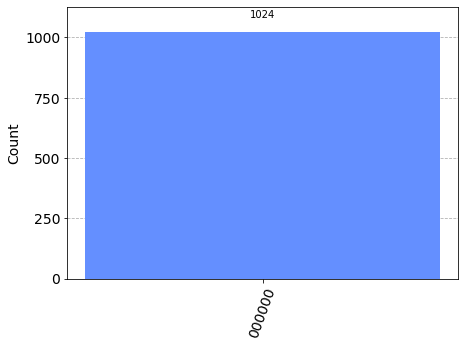

In [123]:
counts = his_sim(circuit)
plot_histogram(counts)

# Two times error correction

## Phase flip: glover algorithm

### Single

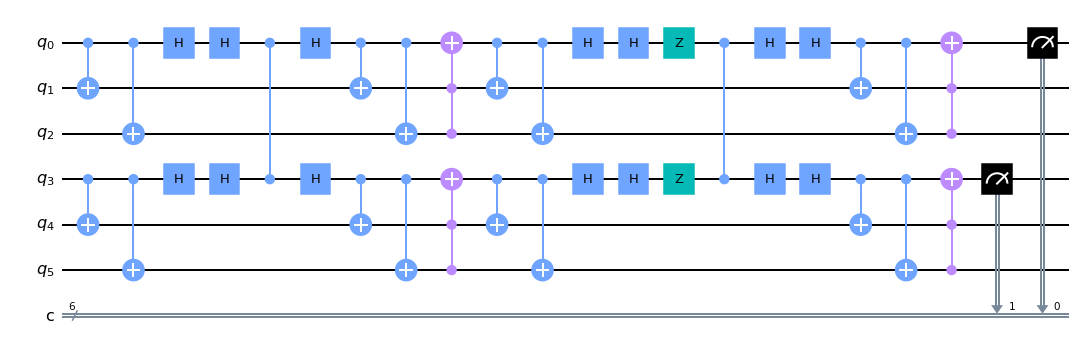

In [124]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.h(qreg_q[3])
circuit.z(qreg_q[0])
circuit.z(qreg_q[3])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw()

{'000001': 251, '000000': 248, '000010': 274, '000011': 251}


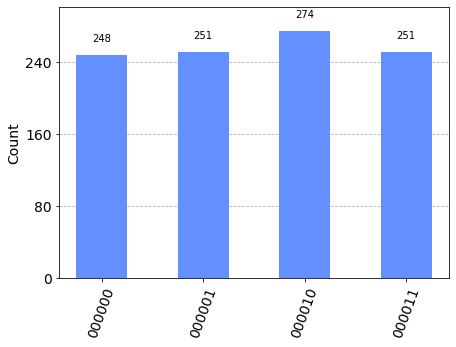

In [125]:
counts = his_sim(circuit)
plot_histogram(counts)

### Majority vote

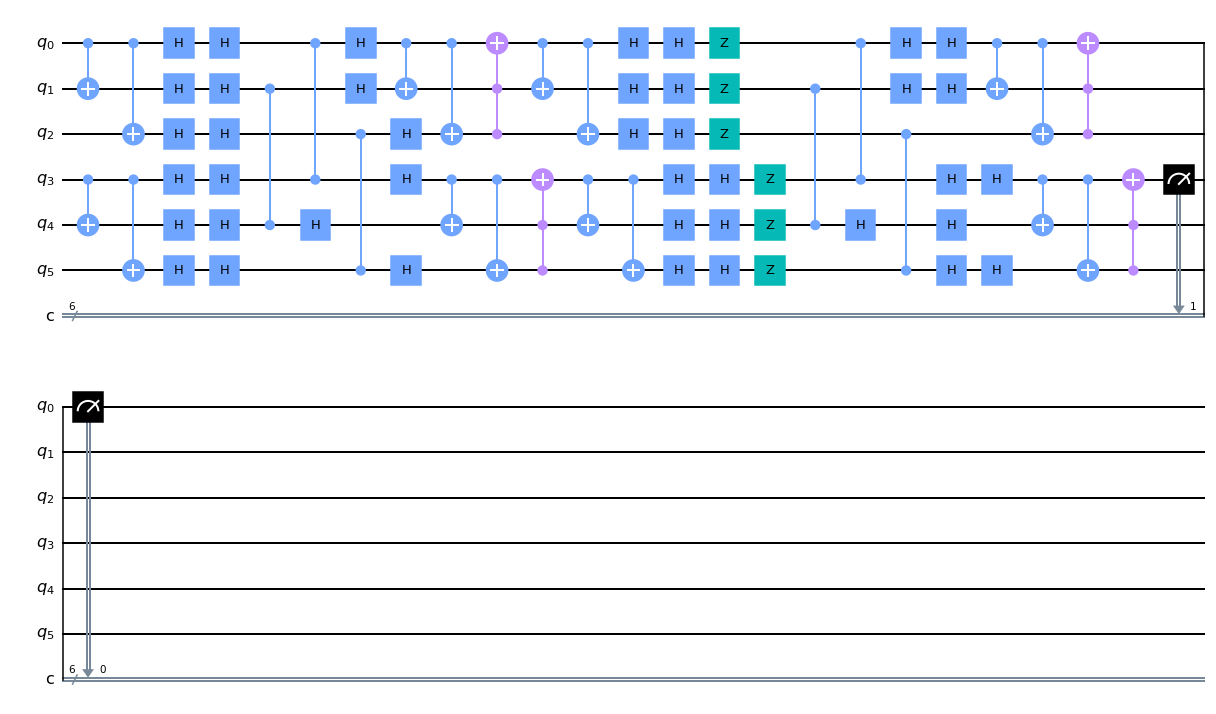

In [126]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[4])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[5])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.h(qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[4])
circuit.h(qreg_q[2])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.h(qreg_q[5])
circuit.h(qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[3])
circuit.z(qreg_q[1])
circuit.z(qreg_q[2])
circuit.z(qreg_q[0])
circuit.z(qreg_q[4])
circuit.z(qreg_q[5])
circuit.z(qreg_q[3])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.h(qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[1])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[4])
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[5])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[5])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw()

{'000001': 236, '000011': 266, '000000': 265, '000010': 257}


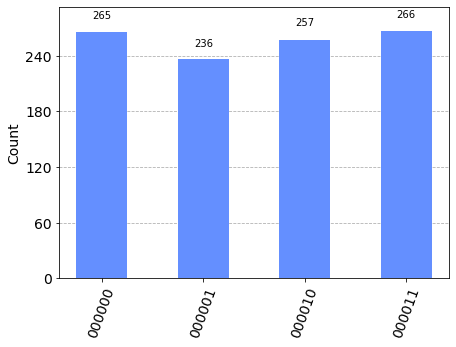

In [127]:
counts = his_sim(circuit)
plot_histogram(counts)

## Bit flip: glover algorithm

### Majority vote

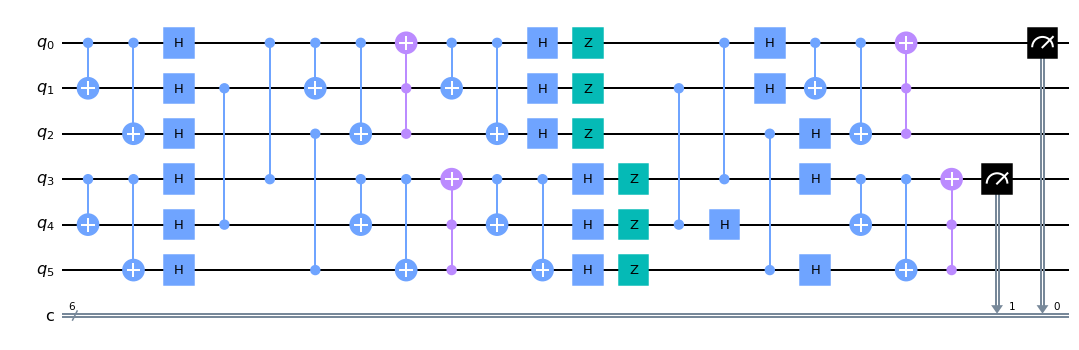

In [59]:
qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[5])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[2])
circuit.h(qreg_q[1])
circuit.h(qreg_q[0])
circuit.h(qreg_q[5])
circuit.h(qreg_q[4])
circuit.h(qreg_q[3])
circuit.z(qreg_q[1])
circuit.z(qreg_q[2])
circuit.z(qreg_q[0])
circuit.z(qreg_q[4])
circuit.z(qreg_q[5])
circuit.z(qreg_q[3])
circuit.cz(qreg_q[1], qreg_q[4])
circuit.h(qreg_q[4])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[1])
circuit.cz(qreg_q[2], qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[5])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.h(qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw()

### Single

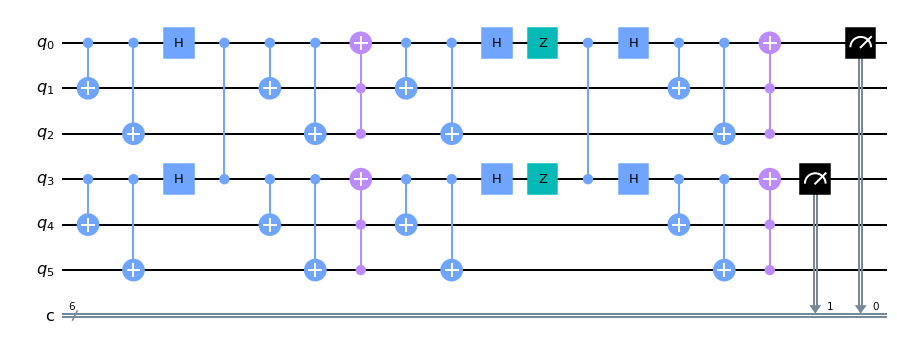

In [128]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(6, 'q')
creg_c = ClassicalRegister(6, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[3])
circuit.h(qreg_q[0])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.z(qreg_q[0])
circuit.z(qreg_q[3])
circuit.cz(qreg_q[0], qreg_q[3])
circuit.h(qreg_q[0])
circuit.h(qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.cx(qreg_q[3], qreg_q[4])
circuit.cx(qreg_q[0], qreg_q[2])
circuit.cx(qreg_q[3], qreg_q[5])
circuit.ccx(qreg_q[5], qreg_q[4], qreg_q[3])
circuit.ccx(qreg_q[2], qreg_q[1], qreg_q[0])
circuit.measure(qreg_q[3], creg_c[1])
circuit.measure(qreg_q[0], creg_c[0])

circuit.draw()

{'000001': 249, '000010': 257, '000000': 259, '000011': 259}


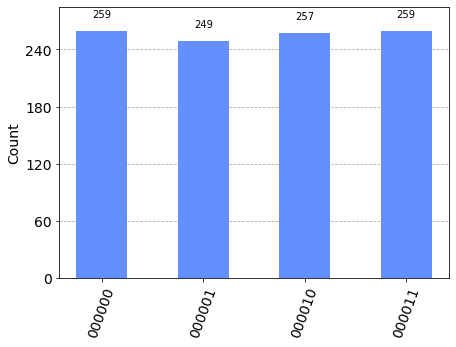

In [129]:
counts = his_sim(circuit)
plot_histogram(counts)